In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

data_train = pd.read_csv('/content/drive/MyDrive/DACON/소비 예측 경진대회/data/train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/DACON/소비 예측 경진대회/data/test.csv')
print(data_train.shape)
data_train.head(5).transpose()

(1108, 22)


,0,1,2,3,4
id,0,1,2,3,4
Year_Birth,1974,1962,1951,1974,1946
Education,Master,Graduation,Graduation,Basic,PhD
Marital_Status,Together,Single,Married,Married,Together
Income,46014.0,76624.0,75903.0,18393.0,64014.0
Kidhome,1,0,0,1,2
Teenhome,1,1,1,0,1
Dt_Customer,21-01-2013,24-05-2014,08-04-2013,29-03-2014,10-06-2014
Recency,21,68,50,2,56
NumDealsPurchases,10,1,2,2,7


# feature 설명
- id : 샘플 아이디
- Year_Birth : 고객 생년월일
- Education : 고객 학력
- Marital_status : 고객 결혼 상태
- Income : 고객 연간 가구 소득
- Kidhome : 고객 가구의 자녀 수
- Teenhome : 고객 가구의 청소년 수
- Dt_Customer : 고객이 회사에 등록한 날짜
- Recency : 고객의 마지막 구매 이후 일수
- NumDealsPurchases : 할인된 구매 횟수
- NumWebPurchases : 회사 웹사이트를 통한 구매 건수
- NumCatalogPurchases : 카탈로그를 사용한 구매 수
- NumStorePuchases : 매장에서 직접 구매한 횟수
- NumWebVisitsMonth : 지난 달 회사 웹사이트 방문 횟수
- AcceptedCmp1: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp2: 고객이 두 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp3: 고객이 세 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp4: 고객이 네 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp5: 고객이 5번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- Complain : 고객이 지난 2년 동안 불만을 제기한 경우 1, 그렇지 않은 경우 0
- Response : 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- target : 고객의 제품 총 소비량

## EDA

- target 분포 확인

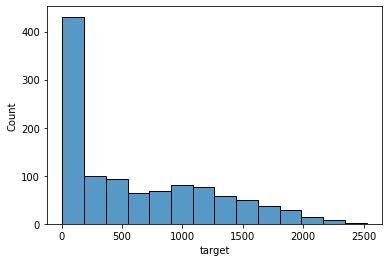

In [ ]:
sns.histplot(data_train['target'])

- income 분포 확인

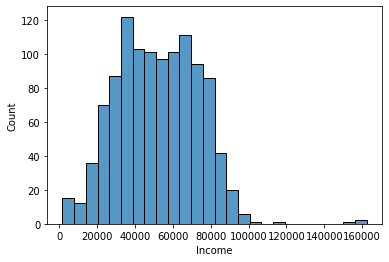

In [ ]:
sns.histplot(data_train['Income'])

- target의 분포가 너무 광범위 하므로 range를 기준으로 나눠 파악해본다.

In [ ]:
data_train_T=data_train['target']
target=[]
for i in range(len(data_train_T)):
    if data_train_T.iloc[i] < 250:
        target.append(1)
    elif data_train_T.iloc[i] < 1000:
        target.append(2)
    elif data_train_T.iloc[i] < 1800:
        target.append(3)
    else:
        target.append(4)
        
data_train["Range"] = target

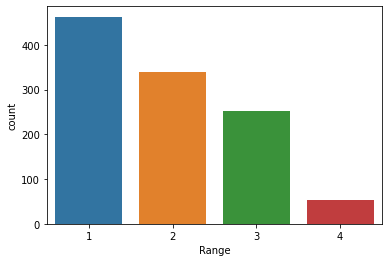

In [ ]:
sns.countplot(x = data_train["Range"])

In [ ]:
#특이점을 가지는 2250 이상 데이터의 수는 100개정도로 파악된다.
data_train[data_train['target']>2250].head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,Range
164,164,1969,Graduation,Together,76653.0,0,0,16-08-2013,91,1,...,2,0,0,1,1,0,0,0,2279,4
422,422,1977,2n Cycle,Together,82326.0,0,0,10-03-2014,30,1,...,2,0,1,1,1,0,0,1,2257,4
573,573,1953,Graduation,Together,94384.0,0,0,04-03-2013,62,0,...,2,0,1,1,1,0,0,1,2302,4
684,684,1947,Master,Together,77632.0,0,0,10-03-2013,73,1,...,2,0,1,1,0,0,0,1,2252,4
783,783,1991,Master,Single,90638.0,0,0,13-02-2014,29,1,...,1,0,0,1,0,0,0,0,2525,4


In [ ]:
data_train.describe()

,id,Year_Birth,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target,Range
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,553.500000,1968.701264,52075.809567,0.429603,0.511733,50.156137,2.33935,4.184116,2.690433,5.905235,5.348375,0.069495,0.085740,0.072202,0.068592,0.015343,0.009025,0.141697,617.121841,1.906137
std,319.996354,12.225380,21310.093395,0.545582,0.551624,29.085582,1.94328,2.810556,2.792236,3.306812,2.405115,0.254408,0.280106,0.258939,0.252873,0.122968,0.094614,0.348896,603.587972,0.910760
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
25%,276.750000,1959.000000,35768.500000,0.000000,0.000000,25.000000,1.00000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.750000,1.000000
50%,553.500000,1970.000000,51609.500000,0.000000,0.000000,51.000000,2.00000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,412.000000,2.000000
75%,830.250000,1977.000000,68325.000000,1.000000,1.000000,76.000000,3.00000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1068.750000,3.000000
max,1107.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,15.00000,27.000000,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,4.000000


## 데이터 전처리

In [ ]:
data_train['Age'] = 2022 - data_train['Year_Birth']
data_test['Age'] = 2022 - data_train['Year_Birth']

In [ ]:
data_train['Education'].value_counts()

Graduation    570
PhD           254
Master        173
2n Cycle       89
Basic          22
Name: Education, dtype: int64

- 학사 = 0, Basic, Graduation
- 석사 = 1, 2n Cycle, Master
- 박사 = 2, PhD

In [ ]:
#train set 및 test set에 적용
for data in [data_train, data_test]:
    for i in range(data.shape[0]):
        education = data['Education'].iloc[i]
        if education in ["Basic", "Graduation"]:
            data['Education'].iloc[i] = 0
        elif education in ["2n Cycle", "Master"]:
            data['Education'].iloc[i] = 1
        else:
            data['Education'].iloc[i] = 2

In [ ]:
data_train['Marital_Status'].value_counts()

Married     415
Together    296
Single      234
Divorced    120
Widow        39
Alone         2
YOLO          1
Absurd        1
Name: Marital_Status, dtype: int64

- 결혼, 동거 = 0, Married, Together
- 싱글 = 1, Single, Divorced, Widow, Alone, YOLO, Absurd

In [ ]:
#train set 및 test set에 적용
for data in [data_train, data_test]:
    for i in range(data.shape[0]):
        marital_status = data['Marital_Status'].iloc[i]
        if marital_status in ["Married", "Together"]:
            data['Marital_Status'].iloc[i] = 0
        else:
            data['Marital_Status'].iloc[i] = 1

- 타임스탬프 Dt_Customer를 회사 가입 개월수인 Sign_Month로 변환
- sign_month = 사이트에 가입하고 몇개월이나 지났는가? 높을수록 예전에 가입한사람

In [ ]:
for data in [data_train, data_test]:
    for i in range(data.shape[0]):
        data['Dt_Customer'].iloc[i] = int(data['Dt_Customer'].iloc[i][-1]) * 12 + int(data['Dt_Customer'].iloc[i][3:5])
        
recent_month = max(data_train['Dt_Customer'])

for data in [data_train, data_test]:
    month_arr = []
    for i in range(data.shape[0]):
        month_arr.append(recent_month - data['Dt_Customer'].iloc[i])
        
    data['Sign_Month'] = month_arr

In [ ]:
corr_matrix = data_train.corr()
corr_matrix["target"].sort_values(ascending=False)

target                 1.000000
Range                  0.954404
NumCatalogPurchases    0.798065
Income                 0.784084
NumStorePurchases      0.677785
NumWebPurchases        0.546082
AcceptedCmp5           0.458208
AcceptedCmp1           0.361102
AcceptedCmp4           0.256784
Response               0.242760
Sign_Month             0.176342
Age                    0.136035
AcceptedCmp2           0.129995
Recency                0.050873
AcceptedCmp3           0.040736
id                     0.034192
Complain              -0.058704
NumDealsPurchases     -0.072802
Teenhome              -0.109214
Year_Birth            -0.136035
NumWebVisitsMonth     -0.488252
Kidhome               -0.538365
Name: target, dtype: float64

In [ ]:
# 불필요한 feature 제거

#data_train = data_train.drop(["id", "Dt_Customer", "Year_Birth"], axis = 1)
data_train = data_train.drop(["id", "Dt_Customer", "Year_Birth", "Range"], axis = 1)
data_test = data_test.drop(["id", "Dt_Customer", "Year_Birth"], axis = 1)

In [ ]:
data_train_X = data_train.drop(["target"], axis = 1)
data_train_y = data_train["target"]

In [ ]:
x_train = data_train_X
y_train = data_train_y
x_test = data_test

x_train = x_train.astype({'Education':'int64', 'Marital_Status':'int64'})
x_test = x_test.astype({'Education':'int64', 'Marital_Status':'int64'})

In [ ]:
x_train = x_train.astype({'Education':'int64', 'Marital_Status':'int64'})
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1108 non-null   int64  
 1   Marital_Status       1108 non-null   int64  
 2   Income               1108 non-null   float64
 3   Kidhome              1108 non-null   int64  
 4   Teenhome             1108 non-null   int64  
 5   Recency              1108 non-null   int64  
 6   NumDealsPurchases    1108 non-null   int64  
 7   NumWebPurchases      1108 non-null   int64  
 8   NumCatalogPurchases  1108 non-null   int64  
 9   NumStorePurchases    1108 non-null   int64  
 10  NumWebVisitsMonth    1108 non-null   int64  
 11  AcceptedCmp3         1108 non-null   int64  
 12  AcceptedCmp4         1108 non-null   int64  
 13  AcceptedCmp5         1108 non-null   int64  
 14  AcceptedCmp1         1108 non-null   int64  
 15  AcceptedCmp2         1108 non-null   i

In [ ]:
def NMAE(true, pred):
    score = np.mean(np.abs(true - pred) / true)
    return score

# 모델링

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
param = {
    'max_depth':[2,3,4],
    'n_estimators':range(300,600,100), #  'n_estimators':range(600,700,50) 여기에 cv 10 (이거와 별반차이가 없다.)
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor()
model1 = lgb.LGBMRegressor()
grid_search = GridSearchCV(estimator=model1, param_grid=param, cv=10, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(x_train, y_train)
print(grid_search.best_params_)


In [ ]:
{'colsample_bylevel': 0.5, 'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 600}
\
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [ ]:
#pip install lightgbm

In [ ]:
#pip install catboost

In [ ]:
#pip install ngboost

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.utils import shuffle
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from ngboost import NGBRegressor


skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True) #총 10번의 fold 진행
n = 0 #x번째 fold인지 기록

fold_target_pred = []
fold_score = []

for train_index, valid_index in skf.split(data_train_X, data_train_X['Range']): #range 기준으로 stratified k fold 진행
    n += 1
    
    val_pred_name = [] #validation pred model 이름 저장
    val_pred = []      #validation set pred 결과 저장
    target_pred = []   #test set pred 결과 저장
    
    train_X = np.array(data_train_X.drop("Range", axis = 1)) #분배된 학습을 위해 생성한 Range feature 제거
    train_Y = np.array(data_train_y)
    
    X_train, X_valid = train_X[train_index], train_X[valid_index]
    y_train, y_valid = train_Y[train_index], train_Y[valid_index]
    
    X_test = np.array(data_test)

    ### Create Model ###
    
    ###모델을 생성하고 집어넣으면 됩니다.
    
    ### LGBMRegressor ###
    model = LGBMRegressor(random_state = 42, verbose = 0) #추가적으로 하이퍼파라미터 튜닝 필요
    model.fit(X_train, y_train) # 모델 학습
    
    val_pred_name.append("LGBMRegressor")      # 모델 이름 저장
    val_pred.append(model.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    ### XGBRegressor ###
    model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1) #추가적으로 하이퍼파라미터 튜닝 필요
    model.fit(X_train, y_train)
    
    val_pred_name.append("XGBRegressor")      # 모델 이름 저장
    val_pred.append(model.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    ### CatBoostRegressor ###
    model = CatBoostRegressor(random_state = 42) #추가적으로 하이퍼파라미터 튜닝 필요
    model.fit(X_train, y_train)
    
    val_pred_name.append("CatBoostRegressor")      # 모델 이름 저장
    val_pred.append(model.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    ### voting ###
    
    ### average validation pred ###
    preds = np.array(val_pred[0])
    for i in range(1, len(val_pred)):
        preds += val_pred[i]
    
    preds = preds/len(val_pred)
    
    ### average target pred ###
    target_preds = np.array(target_pred[0])
    for i in range(1, len(target_pred)):
        target_preds += target_pred[i]
    
    target_preds = target_preds/len(target_pred)
    
    fold_target_pred.append(target_preds) # append final target pred
    
    print("========== fold %d ==========" %(n))
    for i in range(len(val_pred)):
        print("%s model NMAE : %0.4f" %(val_pred_name[i], NMAE(y_valid, val_pred[i].astype(int))))
        
    print("==============================")
    print("Average NMAE %0.4f" %(NMAE(y_valid, preds.astype(int))))
    print("")
    
    fold_score.append(NMAE(y_valid, preds.astype(int)))

total_score = fold_score[0]
for i in range(2, len(fold_score), 1):
    total_score += fold_score[i]
total_score = total_score/(len(fold_score))    

print("==============================")
print("Total Average NMAE %0.4f" %(total_score)) #최종 average score 출력

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
41:	learn: 248.8493029	total: 67.3ms	remaining: 1.53s
42:	learn: 246.0508148	total: 68.8ms	remaining: 1.53s
43:	learn: 242.7279232	total: 70.3ms	remaining: 1.53s
44:	learn: 240.3274532	total: 72.1ms	remaining: 1.53s
45:	learn: 237.8347434	total: 73.6ms	remaining: 1.53s
46:	learn: 235.5763160	total: 75.1ms	remaining: 1.52s
47:	learn: 233.5154125	total: 76.6ms	remaining: 1.52s
48:	learn: 231.4787145	total: 78.1ms	remaining: 1.51s
49:	learn: 229.2474743	total: 79.6ms	remaining: 1.51s
50:	learn: 227.0763519	total: 81.1ms	remaining: 1.51s
51:	learn: 225.2403164	total: 82.6ms	remaining: 1.5s
52:	learn: 223.1007359	total: 84ms	remaining: 1.5s
53:	learn: 221.0775605	total: 85.3ms	remaining: 1.49s
54:	learn: 219.4063659	total: 86.8ms	remaining: 1.49s
55:	learn: 217.8991162	total: 88.2ms	remaining: 1.49s
56:	learn: 216.1998129	total: 90.1ms	remaining: 1.49s
57:	learn: 214.5117210	total: 91.5ms	remaining: 1.49s
58:	learn: 212.9113652	total: 93.2ms	remaining: 1.

In [ ]:
### average target pred ###
final_pred = np.array(fold_target_pred[0])
for i in range(1, len(fold_target_pred)):
    final_pred += fold_target_pred[i]

final_pred = final_pred/len(fold_target_pred)
final_pred = final_pred.astype(int)

In [ ]:
submission['target'] = final_pred
submission.head()

,id,target
0,0,563
1,1,755
2,2,756
3,3,1144
4,4,1194


In [ ]:
submission.to_csv("Sub_2.csv",index=False)